# Notions d'arithmétique-machine

### Séance du Mercredi 8 février 2023:
--- 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

####  1 - Un calcul déroutant !

In [2]:
#Activité numérique 1(double_précision):
nmax = 25
u = 1.0/np.exp(1.0) #u_1
print(f"u_1 = {u:.16G}")
for n in range(2, nmax+1):
    u = 1.0 -n*u
    print(f"u_{n} = {u:.16G}")

u_1 = 0.3678794411714423
u_2 = 0.2642411176571153
u_3 = 0.207276647028654
u_4 = 0.170893411885384
u_5 = 0.1455329405730801
u_6 = 0.1268023565615195
u_7 = 0.1123835040693635
u_8 = 0.1009319674450921
u_9 = 0.09161229299417073
u_10 = 0.0838770700582927
u_11 = 0.07735222935878028
u_12 = 0.07177324769463667
u_13 = 0.06694777996972334
u_14 = 0.06273108042387321
u_15 = 0.05903379364190187
u_16 = 0.05545930172957014
u_17 = 0.05719187059730757
u_18 = -0.02945367075153627
u_19 = 1.559619744279189
u_20 = -30.19239488558378
u_21 = 635.0402925972594
u_22 = -13969.88643713971
u_23 = 321308.3880542133
u_24 = -7711400.313301118
u_25 = 192785008.832528


On trouve des résultats aberrant (notamment u_18 qui est négatif alors que c'est une intégrale de termes purement positif...). L'erreur provient de la précision de la machine. On ne peut pas stocker la variable de exp(-1)... Or en utilisant la formule de reccurence on incrémente de manière factorielle l'erreur commise qui, de base à u_1, est celle de la valeur de exp(-1) cad 10^-16. Python est en double précision (10^-16). Mais on peut aussi travailer en simple précision (10^-7) cf la suite:

In [3]:
#Activité numérique 2(simple précision):
nmax = 25
u = 1.0/np.exp(np.float32(1.0)) #u_1 insertion du float 32 pour la simple précision
print(f"u_1 = {u:.7G}")
for n in range(2, nmax+1):
    u = 1.0 -n*u
    print(f"u_{n} = {u:.7G}")

u_1 = 0.3678794
u_2 = 0.2642412
u_3 = 0.2072765
u_4 = 0.1708939
u_5 = 0.1455304
u_6 = 0.1268175
u_7 = 0.1122772
u_8 = 0.1017825
u_9 = 0.08395744
u_10 = 0.1604256
u_11 = -0.764682
u_12 = 10.17618
u_13 = -131.2904
u_14 = 1839.066
u_15 = -27584.98
u_16 = 441360.7
u_17 = -7503131
u_18 = 1.350564E+08
u_19 = -2.566071E+09
u_20 = 5.132142E+10
u_21 = -1.07775E+12
u_22 = 2.37105E+13
u_23 = -5.453414E+14
u_24 = 1.308819E+16
u_25 = -3.272048E+17


#### 2 - Représentation sur ordinateur.

##### 2.1 Les nombres-machines.

In [4]:
#Activité numérique 3
#UFL (plus petit nombre-machine normalisé)
print(np.finfo(np.float64).tiny)
#OFL (plus grand nombre-machine normalisé)
print(np.finfo(np.float64).max)
#epislon-machine
print(np.finfo(np.float64).eps)
#Paramètres de 'oridnateur (double précision)
print(np.finfo(np.float64))

2.2250738585072014e-308
1.7976931348623157e+308
2.220446049250313e-16
Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------



On l'a vu avec l'ensemble des nombre-machine $\normalsize\mathbb{F}$. On ne peut pas réprésenter tous les nombres est on a fixé des règles imposant une représentation minimale et maximale... De plus l'ensemble n'est pas continu il existe un 'epsilon machine' d'écart entre deux de ces nombres cf au-dessus...

##### 2.2 Un réel est-il toujours un nombre-machine ?

In [5]:
#Activité Numérique 4(commentaire voir le markdown suivant).
x = np.float32(1)/np.float32(3)
print(f"1/3 (single-précision) : {x:.20G}.")
x = np.float64(1)/np.float64(3)
print(f"1/3 (double-précision) : {x:.20G}.")

x = np.float32(1)/np.float32(10)
print(f"1/10 (single-précision) : {x:.20G}.")
x = np.float64(1)/np.float64(10)
print(f"1/10 (double-précision) : {x:.20G}.")



1/3 (single-précision) : 0.3333333432674407959.
1/3 (double-précision) : 0.33333333333333331483.
1/10 (single-précision) : 0.10000000149011611938.
1/10 (double-précision) : 0.10000000000000000555.


Ici on voit bien que 1/10 et 1/3 n'apartiennent pas a $\normalsize\mathbb{F}$. Il y a donc une erreur commise sur leur représentation égale au pire à l'epsilon machine divisé par 2(en effet la norme prend le nombre machine le plus proche pour représenter un réel x quelconque...). D'ailleurs on voit bien l'erreur ici: en single-precision c'est 10^-7(espilon-machine) divise par 2 fois le nombre donc ici environ 10^-7 et pareil en double-precision c'est un peu près 10^-16 ici... On ne peut pas dire que l'erreur est directement égale à l'epsilon-machine divisé par 2 car on a (aparemment) repéré des erreurs comme ca... C'est un axiome! on a: $$ fl(x) = x \times (1+\delta_x) $$avec $fl(x)$ le nombre-machine stocké, $x$ le nombre réel en question et $\delta_x$ tel que $|\delta_x| \leq \Large\frac{\epsilon}{2}$ (epsilon-machine).

On a donc bien une erreur égale à: $x \times \delta_x$ En effet on a: $\delta_x = \frac{f(x) - x}{x}$ soit une erreur relative.

##### 2.3 Opération-machine

Quand l'ordinateur fait une opération machine sur deux nombres machines y'a aussi une erreur tel que: $\delta_x = \frac{fl(x*y)-x*y}{x*y}$... Par contre lorsqu'on fait un calcul sur des nombres meme pas machines ? L'ordinateur fait alors trois erreurs 2 d'affectations(on réécrit x et y avec les fl(x) et fl(y)) et une d'opération(cf avant).

In [6]:
#Activité Numérique 5
#   Question 1
p = 3*(0.1+ 0.1 + 0.1)
print("3*(0.1+ 0.1 + 0.1) = {}".format(p))
print("3*(0.1+ 0.1 + 0.1) = {:.16G}".format(p))
print("3*(0.1+ 0.1 + 0.1) = {:.20G}".format(p))
#   Question 2
from math import sqrt
p = sqrt(2)*sqrt(2)
print("sqrt(2)*sqrt(2)=",p)
print(p==2)
print("sqrt(2)*sqrt(2)-2=", p-2)
print("sqrt(2)*sqrt(2) = {:.20G}".format(p))
#   Question 3
a = 4.0/3.0; print("a={}".format(a))
b = a-1.0; print("b={}".format(b))
c = b+b+b; print("c={}".format(c))
d = 1.0-c; print("1-((4/3-1)+(4/3-1)+(4/3-1)) = {}".format(d))

3*(0.1+ 0.1 + 0.1) = 0.9000000000000001
3*(0.1+ 0.1 + 0.1) = 0.9000000000000001
3*(0.1+ 0.1 + 0.1) = 0.90000000000000013323
sqrt(2)*sqrt(2)= 2.0000000000000004
False
sqrt(2)*sqrt(2)-2= 4.440892098500626e-16
sqrt(2)*sqrt(2) = 2.0000000000000004441
a=1.3333333333333333
b=0.33333333333333326
c=0.9999999999999998
1-((4/3-1)+(4/3-1)+(4/3-1)) = 2.220446049250313e-16


On voit ici que nos calculateurs ne sont pas très robustes... Le plus remarquable est la question 3. On devrait obtenir 0 et on obtient l'épsilon! De plus la non-formalisation des nombres fait peur quand on voit que pour python sqrt(2)*sqrt(2) != 2.

#### 3 Sensibilité aux erreurs d'arrondi 

##### 3.1 Erreur par absorption (l'éléphant et la souris!)

Plus généralement, étant donnés deux nombres-machines $x_m$ et $y_m$ de même signe, puisque $x_m + y_m = x_m (1 + \frac{y_m}{x_m})$, on a $x_m +(machine) y_m = x_m$ dès que:$ \frac{y_m}{x_m}<\frac{\epsilon_m}{2}$ Le y_m se fait absorber par le x_m.

In [7]:
#Activité numérique 6
import numpy as np
epsm = np.finfo(np.float64).eps
res1 = 1.0 + epsm - 1.0
print("res1 = {:.20F}".format(res1))
res2 = 1.0 + epsm/2.0 - 1.0
print("res2 = {:.20F}".format(res2))
res3 = 1.0 + epsm/2.0 + epsm/2.0
print("res3 = {:.20F}".format(res3))
res4 = 1.0 + (epsm/2.0 + epsm/2.0)
print("res4 = {:.20F}".format(res4))
res5 = epsm/2.0 + 1.0 - epsm/2.0
print("res5 = {:.20F}".format(res5))
res6 = epsm/2.0 + (1.0 - epsm/2.0)
print("res6 = {:.20F}".format(res6))

res1 = 0.00000000000000022204
res2 = 0.00000000000000000000
res3 = 1.00000000000000000000
res4 = 1.00000000000000022204
res5 = 0.99999999999999988898
res6 = 1.00000000000000000000


Idée de l'éléphant et de la souris. Attention l'epsilon machine($\epsilon_m$) est une constante mais l'écart entre deux nombres machine n'est pas toujours égale à cet écart. L'écart entre le nombre et son succ ou son pred dépend du nombre... d'où les différentes absorptions qu'on observe en haut(munis toi de la page 3(en-tête)  

In [8]:
#Activité numérique 7
H1 = np.float32(1.0)
test = False
n = 1
while test == False:
    n = n + 1
    H2 = H1 + np.float32(1)/np.float32(n)
    test = H1 == H2
    H1 = H2

print(f"H_{n} = {H1}")

H_2097152 = 15.403682708740234


L'activité précédente montre qu'au bout de 2 097 152 itérations, la série harmonique devient constante... ce qui est problématique car c'est une série divergente en réalité. En effet au bout d'un moment le nombres 1/n est absorbé par le nombre Hn-1.

##### 3.2 Erreur par cancellation

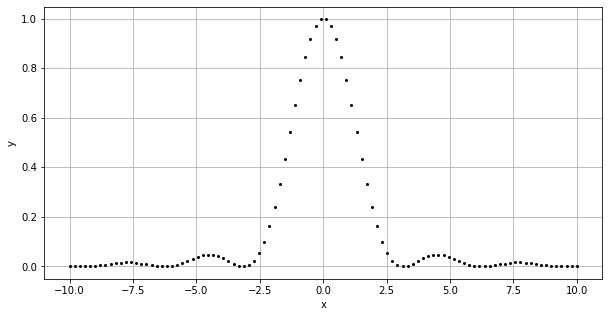

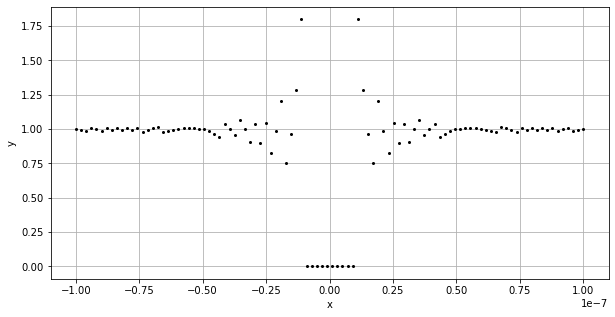

In [25]:
#Activité Numérique 8.
f = lambda x : (1-np.cos(x)**2)/x**2

fig, ax = plt.subplots(figsize = (10,5))
x = np.linspace(-10,10,100)
ax.plot(x,f(x),'o', color='black', ms=2)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.grid()
plt.show()


fig, ax = plt.subplots(figsize = (10,5))
x = np.linspace(-1e-7,1e-7,100)
ax.plot(x,f(x),'o',color='black', ms=2)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.grid()
plt.show()

Phénomène de cancellation ? ==> oui le phénomène de cancellation est un phénomène qui augmente les résidues d'une soustraction normallement proche de 0. ici on a une soustraction 1-1 en 0 qu'on divise par un truc tres grand.

Calcul des racines d'un trinôme

In [ ]:
#Activité Numérique 9:
pmax = 8
betal = np. zeros (pmax+1);
beta2 = np. zeros (pmax +1)
for p in range (pmax+1):
    a = 1
    b = 10**p+10**(-p)
    c = 1 # coef. du trinôme
    delta = b**2-4*a*c # discriminant du trinôme
    #racines du trinome
    betal [p] = (-b+np.sqrt(delta))/(2*a)
    beta2 [p] = (-b-np.sqrt(delta))/(2*a)
print("Valeurs de la première racine")
for p in range (pmax+1):
    print('p : {} -> {:.16G}'.format(p, betal[p]))
print("Valeurs de la deuxième racine")
for p in range (pmax+1):
    print("p : {} -> {:.16G}".format(p, beta2 [p]))
print ("Mais qu'est-ce done ?")
for p in range (pmax+1):
    a = 1
    b = 10**p+10**(-p)
    c = 1
    beta = (-2*c)/(b+np.sqrt(b**2-4*a*c))
    print("p : {} -> {:.16G}".format(p, beta))
